In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from openpyxl import load_workbook


In [5]:
kegg_pathway = pd.read_excel('KEGG_Pathway/KEGG_PathwayKO(brite).xlsx')
kegg_pathway = kegg_pathway.replace(np.nan, '')
pathwayname = kegg_pathway.columns[1:].tolist()

['K02663', 'K03006', 'K03283', 'K03289', 'K03403', 'K03936', 'K04110', 'K07057', 'K07671', 'K08286', 'K09490', 'K09802', 'K11707', 'K11708', 'K11709', 'K11710', 'K12436']
['K02663', 'K03006', 'K03283', 'K03289', 'K07671', 'K09802', 'K11707', 'K11708', 'K11709', 'K11710', 'K12436']
['K02663', 'K03283', 'K03289', 'K11707', 'K11708', 'K11709', 'K11710']


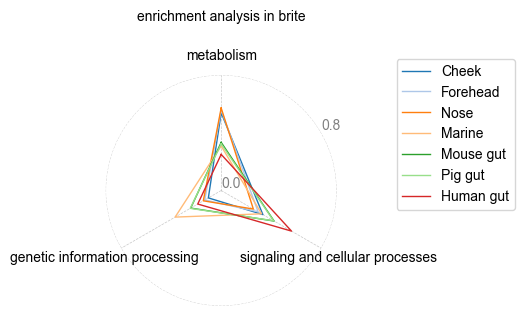

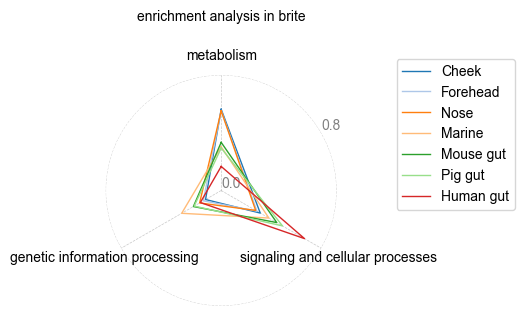

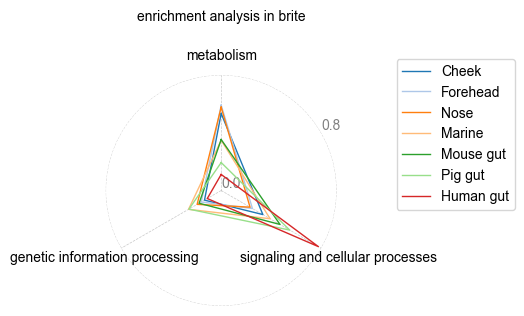

In [6]:
file_path = 'bimodal genes/Bimodal Gene numbers(scott).xlsx'
communities_namelist1 = ['Human gut','Nose','Cheek','Forehead','Pig gut','Mouse gut','Marine']
communities_namelist2=['Cheek','Forehead','Nose','Marine','Mouse gut','Pig gut','Human gut']
conditionlist = ['Δy&y1&0.15','Δy&y1&0.2','Δy&y1&0.25']
matrix1 = np.zeros((len(communities_namelist1), len(pathwayname)))
for k in range(len(conditionlist)):
    for i in range(len(communities_namelist1)):
        workbook = load_workbook(file_path)
        sheet = workbook.active
        cell_value = sheet.cell(row=16+i, column=33+k).value
        bimodalgenes = cell_value.split(', ') if cell_value is not None else []
        check_name = sheet.cell(row=16+i, column=3).value
        if i==0:
            print(bimodalgenes)
        for j in range(len(pathwayname)):
            bimodalgenes_in_pathway = [gene for gene in kegg_pathway[pathwayname[j]] if gene in bimodalgenes]
            matrix1[i,j] = len(bimodalgenes_in_pathway)
    sigmaPD1 = pd.DataFrame(matrix1,index=communities_namelist1,columns=pathwayname)
    sigmaPD1 = sigmaPD1.reindex(communities_namelist2)
    file_name1 = f'fig/enrichment analysis in brite(different condition)/enrichment analysis in brite({conditionlist[k]}).csv'
    sigmaPD1.to_csv(file_name1)

    fig = plt.figure(figsize=(3, 3))
    plt.rcParams['pdf.fonttype'] = 42
    plt.rcParams['font.family'] = 'Arial'
    ax = fig.add_subplot(111, polar=True)
    colors = plt.get_cmap('tab20').colors
    # data preparing
    for i in range(len(communities_namelist2)):
        labels = ['metabolism','genetic information processing','signaling and cellular processes']
        scores = (sigmaPD1.iloc[i][0:3]/sum(sigmaPD1.iloc[i])).values.tolist()
        
        # Data closure processing (connected end to end to form a polygon)
        scores = np.concatenate((scores, [scores[0]]))
        labels = np.concatenate((labels, [labels[0]]))

        # Calculate angles
        angles = np.linspace(0, 2*np.pi, len(labels)-1, endpoint=False).tolist()
        angles += angles[:1]  # Close the angles

        # Set the angle of the radar chart
        ax.set_theta_offset(np.pi / 2)
        

        # Draw the polygon
        ax.plot(angles, scores, color=colors[i], linewidth=1, linestyle='solid', label=communities_namelist2[i])

    # Label and style optimization
    ax.set_xticks(angles[:-1])  # Exclude the duplicate label of the closing point
    ax.set_xticklabels(labels[:-1], fontsize=10)
    ax.set_rlabel_position(-60)   # Polar scale label offset angle

     # Hide all border lines
    for spine in ax.spines.values():
        spine.set_visible(False)
        
    plt.yticks([0, 0.8], color="grey", size=10)  # Polar radius scale
    plt.ylim(0, 0.8)   # Fixed score range

    # Title and grid beautification
    plt.title("enrichment analysis in brite", fontsize=10, pad=20)
    ax.grid(linestyle='--', linewidth=0.5, alpha=0.7)
    ax.legend(loc='upper right', bbox_to_anchor=(1.8, 1.1))
    file_name2 = f'fig/enrichment analysis in brite(different condition)/enrichment analysis in brite({conditionlist[k]}).pdf'
    fig.savefig(file_name2,bbox_inches='tight')